## Homework 10



### Step 1
Use the data from ```data/subset_homework``` folder and visualize some examples. How many images are there for each class?

In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nelia\AppData\Local\Temp\ipykernel_19956\2742648189.py:1: SyntaxWarning: invalid escape sequence '\s'
  folder = 'data\subset_homework'


Class 0 has 2220 images
Class 1 has 2250 images
Loaded 4470 images
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


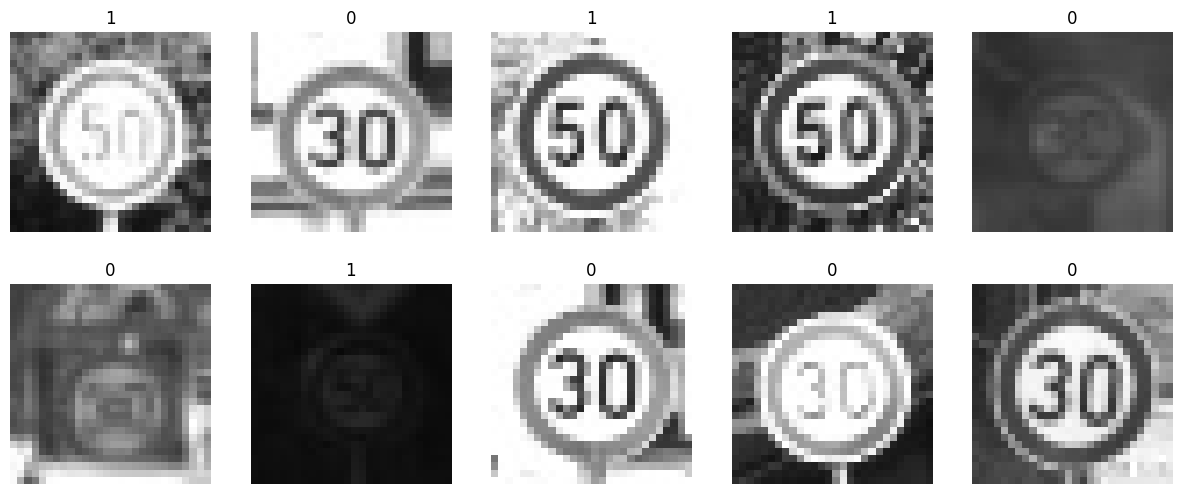

In [ ]:
folder = 'data\subset_homework'

# Load images and labels
classes = 2
images = []
labels = []
for i in range(classes):
    fnames = os.listdir(os.path.join(folder, f'class_id_{i}'))
    print('Class', i, 'has', len(fnames), 'images')
    images += [cv2.imread(os.path.join(folder, f'class_id_{i}', f), cv2.IMREAD_UNCHANGED) for f in fnames]
    labels += [i] * len(fnames)
images, labels = shuffle(images, labels)

print('Loaded', len(images), 'images')

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx]), plt.axis(False)

### Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve? 

81,99%

In [9]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [73]:
#Prepare data 
pixels = np.array([image.flatten() for image in images])/255
labels = np.array(labels)
images = np.array(images)/255
print('Pixels shape:', pixels.shape)

# Split data into train and test sets
train_size = int(len(pixels) * 0.8)
test_size = len(pixels) - train_size
train_pixels = pixels[:train_size]
train_labels = labels[:train_size]
train_images = images[:train_size]
test_pixels = pixels[train_size:]
test_labels = labels[train_size:]
test_images = images[train_size:]

Pixels shape: (4470, 784)


In [43]:
# build model
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)
model.compile(optimizer ='adam', loss = 'mean_squared_error')

model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# train the model
history = model.fit(train_pixels, train_labels, epochs=10, batch_size=32)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3873
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2509
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2115
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1819
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1608
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1447
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1271
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1246
Epoch 9/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1217
Epoch 10/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1075


In [45]:
# Evaluate the model
predictions = model.predict(test_pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, test_labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(test_labels))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy 0.819910514541387


### Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?

98,76%

However, I did not use any regularization techniques (Dropout, label smoothing, augmentation, weight decay), so this is definitely not the highest accuracy that could be achived.

In [ ]:
# run more epochs previous model
history = model.fit(train_pixels, train_labels, epochs=40, batch_size=32) # continue training

# Evaluate the model
predictions = model.predict(test_pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, test_labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(test_labels))
# accuracy is 96% 


Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1098
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1012
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0965
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0931
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0919
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0904
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0943
Epoch 8/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0867
Epoch 9/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0883
Epoch 10/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0851
Epoch 11/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0853
Epoch 12/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0841
Epoch 13/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0827
Epoch 14/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0793
Epoch 15/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [54]:
# build model with sigmoid activation and binary crossentropy loss
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="sigmoid")(inputs)
model_2 = Model(inputs, outputs)
model_2.compile(optimizer ='adam', loss = 'binary_crossentropy')

model_2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
history = model_2.fit(train_pixels, train_labels, epochs=70, batch_size=32)

# Run it on the entire dataset
predictions = model_2.predict(test_pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, test_labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(test_labels))

# 94,63% accuracy

Epoch 1/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6717
Epoch 2/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6230
Epoch 3/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5904
Epoch 4/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5617
Epoch 5/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5386
Epoch 6/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5245
Epoch 7/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5037
Epoch 8/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4755
Epoch 9/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4652
Epoch 10/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4492
Epoch 11/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4421
Epoch 12/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4342
Epoch 13/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4145
Epoch 14/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4134
Epoch 15/70
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [67]:
# model with hidden layer
inputs = Input(shape=(pixels.shape[1],))
hidden = Dense(128, activation="relu")(inputs)
outputs = Dense(1, activation="sigmoid")(hidden)
model_3 = Model(inputs, outputs)
model_3.compile(optimizer ='adam', loss = 'binary_crossentropy')


In [ ]:
# train the model
history = model_3.fit(train_pixels, train_labels, epochs=29, batch_size=32)

# Run it on the entire dataset
predictions = model_3.predict(test_pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, test_labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(test_labels))
# after 29 epochs accuracy is 96,31%

Epoch 1/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1624
Epoch 2/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1285
Epoch 3/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1137
Epoch 4/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1186
Epoch 5/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1125
Epoch 6/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1600
Epoch 7/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1096
Epoch 8/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1098
Epoch 9/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1174
Epoch 10/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0947
Epoch 11/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0978
Epoch 12/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1195
Epoch 13/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0809
Epoch 14/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0775
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy 0.963087

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# simple CNN
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy')

model.fit(train_images, train_labels, epochs=11, batch_size=32)


Epoch 1/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6664
Epoch 2/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4560
Epoch 3/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1828
Epoch 4/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1029
Epoch 5/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0802
Epoch 6/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0686
Epoch 7/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0470
Epoch 8/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0399
Epoch 9/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0360
Epoch 10/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0334
Epoch 11/11
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0364


In [ ]:
# Run it on the entire dataset
predictions = model.predict(test_images).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, test_labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(test_labels))
# after 29 epochs accuracy is 98,76%

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy 0.9876957494407159
